<a href="https://colab.research.google.com/github/residenthiago2011/Studying/blob/master/Exerc%C3%ADcios%20do%20Workshop%20Pandas%20-%20Milit%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade: Workshop Excel ao Pandas**

O notebook a seguir é referente aos exercícios a serem realizados após o workshop de Pandas. 

**Antes de realizar a sua atividade, clique File > Save a Copy in Drive (Salvar uma Cópia no Drive)**

Você faz parte de uma consultoria de negócios e foi contratado pela *Bikes S.A* para realizar uma breve análise dos negócios e responder a algumas questões, desenvolvendo a estratégia de negócios para a próxima temporada 

### **Exercício 1**
Vamos carregar nosso dataset e entender um pouco sobre ele. 

In [1]:
# Importe o pacote Pandas para a sessão (Lembre-se que, caso precise instalar, use o comando !pip install nome-do-pacote)
import pandas as pd

In [2]:
# Carregue o dataset

# Importar o arquivo do seu computador para o Google Colab
from google.colab import files
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [3]:
# Importar o arquivo do Google Colab para o notebook
import io
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')

In [4]:
# Verifique as primeiras 5 linhas com o método head
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Verifique o tipo de arquivo importado
type(df)

pandas.core.frame.DataFrame

In [6]:
# Verifique as informações (info) do arquivo importado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Execute a célula abaixo antes de seguir para o próximo exercício**

In [7]:
# Apenas execute esta célula para criar duas novas colunas com mês e ano.
df['Date'] = pd.to_datetime(df.Date)
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month

### **Exercício 2**
Agora que sabemos um pouco mais sobre nosso dataset, vamos extrair alguns insights dos dados.

In [8]:
# Visualizando a tabela
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1


In [9]:
# Agrupe a tabela por ano e faça a soma das vendas por ano
df.groupby('Year')["Rented Bike Count"].sum()

Year
2017     185330
2018    5986984
Name: Rented Bike Count, dtype: int64

In [10]:
# Agrupe a tabela por Estação (Seasons) e faça a soma das vendas por estação
df.groupby("Seasons")["Rented Bike Count"].sum()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

In [11]:
# Agrupe a tabela por Mês e tire a média (mean) das vendas por mês
df.groupby("Month")["Rented Bike Count"].mean()

Month
1     386.080645
2     393.023810
3     611.608871
4     772.526389
5     895.091398
6     981.566667
7     929.219086
8     825.524194
9     693.508333
10    842.725806
11    685.294444
12    419.047043
Name: Rented Bike Count, dtype: float64

### **Comente quais foram os insights que você pôde perceber nesses números?**
* Estamos em tendência de alta ou baixa?

*Resposta:*
**Os Meses 4,5,6,7 Foram os que Geraram Maior Receita, Pois o Aluguel de Bicicletas Nesse Periodo do Ano foi Melhor Que os Meses Consecutivos.**
* Qual é a melhor estação?

*Resposta:*
**A Melhor Estação foi o Verão!**
* Qual mês, em média, é melhor?

*Resposta:*
**O Mês de Junho é o Melhor Periodo, Com 981.56.**

*Duplo clique nesta célula para editar a resposta*


### **Exercício 3**
Vamos criar algumas visualizações gráficas com o Pandas

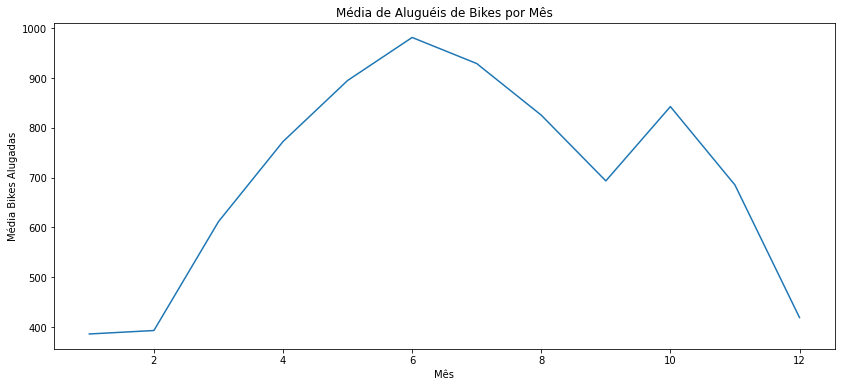

In [12]:
# Faça um gráfico (plot) em linha do agrupamento de Bikes alugadas por mês usando a média (mean) como função de agregação
df.groupby("Month")["Rented Bike Count"].mean().plot(title='Média de Aluguéis de Bikes por Mês',
                                                  xlabel='Mês', 
                                                  ylabel='Média Bikes Alugadas',
                                                  figsize=(14,6));

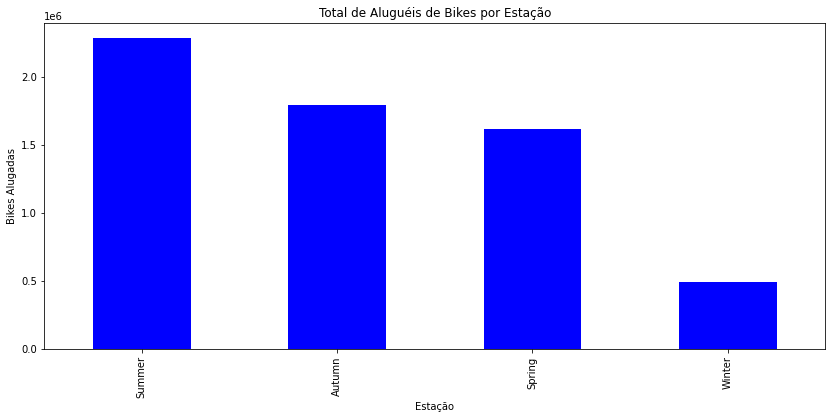

In [13]:
# Faça um gráfico (plot) em barras do agrupamento de Bikes alugadas por Season usando a Soma como função de agregação

# Criando uma variável com o agrupamento e organizando os dados do maior para o menor (Caso queira ver o resultado do agrupamento, execute agg_by_season em uma célula separada)
agg_by_season = df.groupby('Seasons')["Rented Bike Count"].sum().sort_values(ascending=False)

# Criar o gráfico de barras
agg_by_season.plot.bar(title='Total de Aluguéis de Bikes por Estação',
                                                  xlabel='Estação', 
                                                  ylabel='Bikes Alugadas',
                                                  figsize=(14,6),
                                                  color='blue');

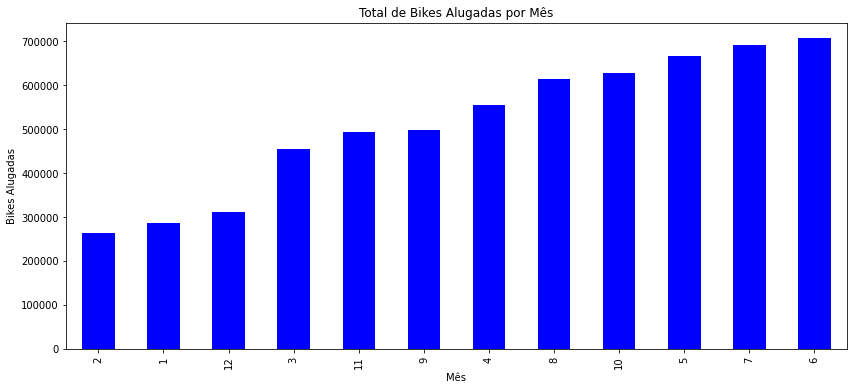

In [14]:
# Gráfico (plot) em Barras do Agrupamento de Bikes Alugadas por Mês Usando a Soma Como Função de Agregação

agg_by_month = df.groupby("Month")["Rented Bike Count"].sum().sort_values(ascending=True)

agg_by_month.plot.bar(title="Total de Bikes Alugadas por Mês",
                      xlabel="Mês",
                      ylabel="Bikes Alugadas",
                      figsize=(14,6),
                      color="blue")

### **Exercício 4**
Em nosso último exercício, vou propor um desafio.

A **correlação** é uma medida estatística que consegue medir qual é a força da relação entre duas variáveis numéricas. Deste modo, é possível medir quais são as variáveis do nosso dataset que mais influenciam o aluguel de Bikes.

[A *correlação* é um número que varia entre 1 e -1](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o). Sempre que este número se aproxima dos extremos 1 ou -1, dizemos que a relação é mais forte entre as variáveis, sendo 1 uma correlação positiva onde a variável A aumenta, B também aumenta e -1 é uma correlação negativa, quando A aumenta e B diminui.

As correlações são mais fracas quanto mais o número se aproxima de zero.

Tendo a documentação do método [df.corr( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html), calcule a correlação entre as variáveis e determine quais podem afetar as vendas do nosso cliente.

In [15]:
correlacao = df.corr(method='pearson', min_periods=1)
correlacao.loc['Rented Bike Count',:]

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Year                         0.215162
Month                        0.070861
Name: Rented Bike Count, dtype: float64

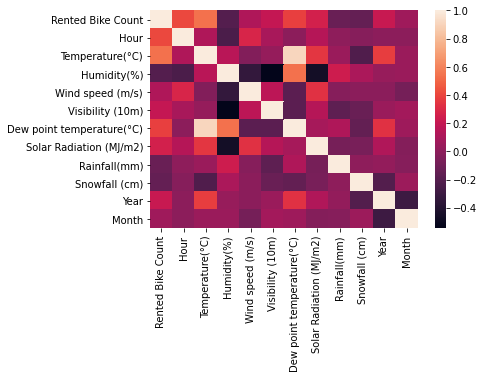

In [16]:
# Para visualizar o mapa de calor, basta executar o código abaixo
import seaborn as sns
sns.heatmap(correlacao);

## **Qual seria a estratégia que você apresentaria ao cliente?**
* Em quais meses ele deve investir mais ou menos?

*Resposta:*
**O Maior Investimento Deve Ser Feito Durante o Meio do Ano, Mês de Junho. Assim Conseguese Captar Maior Numero de Clientes.**

* Quais os melhores meses para criar promoções?

*Resposta:*
**O Mês no Qual Deve-se Fazer Alguma Promoção Para Alvancar as Vendas é Durante o Mês de Fevereiro, Nesse Periodo do Ano as Vendas Ficaram Muito Baixas.**
* Que variáveis podem afetar mais as vendas do cliente?

*Resposta:*
**O Clima é a Variavel que Mais Afeta no Alugel das Bicicletas: Rainfall(-0.12), Snowfall(-0.14) e a Humidade(-0.19).**

Escreva a sua resposta em um parágrafo explicando as suas ações embasadas nos dados coletados das respostas ou de suas próprias análises.